In [171]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [172]:
df1 = pd.read_csv('C:\\Users\\ritik\\OneDrive\\Documents\\GitHub\\Multi-Model-Bias-Detection-and-Debiasing-the-News\\BABE Dataset\\DifferentFiles\\final_labels_MBIC.csv',delimiter=';')
df2 = pd.read_csv('C:\\Users\\ritik\\OneDrive\\Documents\\GitHub\\Multi-Model-Bias-Detection-and-Debiasing-the-News\\BABE Dataset\\DifferentFiles\\final_labels_SG1.csv',delimiter=';')
df3 = pd.read_csv('C:\\Users\\ritik\\OneDrive\\Documents\\GitHub\\Multi-Model-Bias-Detection-and-Debiasing-the-News\\BABE Dataset\\DifferentFiles\\final_labels_SG2.csv',delimiter=';')

babe = pd.concat([df1, df2, df3], ignore_index=True)


In [173]:
babe.head()

,text,news_link,outlet,topic,type,group_id,num_sent,label_bias,label_opinion,article,biased_words
0,YouTube is making clear there will be no “birt...,https://eu.usatoday.com/story/tech/2020/02/03/...,usa-today,elections-2020,center,1.0,1.0,Biased,Somewhat factual but also opinionated,YouTube says no ‘deepfakes’ or ‘birther’ video...,"['belated', 'birtherism']"
1,So while there may be a humanitarian crisis dr...,https://www.alternet.org/2019/01/here-are-5-of...,alternet,immigration,left,1.0,1.0,Biased,Expresses writer’s opinion,Speaking to the country for the first time fro...,['crisis']
2,"Looking around the United States, there is nev...",https://thefederalist.com/2020/03/11/woman-who...,federalist,abortion,right,1.0,1.0,Biased,Somewhat factual but also opinionated,The left has a thing for taking babies hostage...,"['killing', 'never', 'developing', 'humans', '..."
3,The Republican president assumed he was helpin...,http://www.msnbc.com/rachel-maddow-show/auto-i...,msnbc,environment,left,1.0,1.0,Biased,Expresses writer’s opinion,"In Barack Obama’s first term, the administrati...","['rejects', 'happy', 'assumed']"
4,The explosion of the Hispanic population has l...,https://www.breitbart.com/politics/2015/02/26/...,breitbart,student-debt,right,1.0,1.0,Biased,No agreement,"Republicans should stop fighting amnesty, Pres...",['explosion']


In [174]:
babe['type'].unique()

array(['center', 'left', 'right', nan], dtype=object)

In [175]:
babe.columns

Index(['text', 'news_link', 'outlet', 'topic', 'type', 'group_id', 'num_sent',
       'label_bias', 'label_opinion', 'article', 'biased_words'],
      dtype='object')

In [176]:
babe['label_bias'].unique()

array(['Biased', 'No agreement', 'Non-biased'], dtype=object)

[]

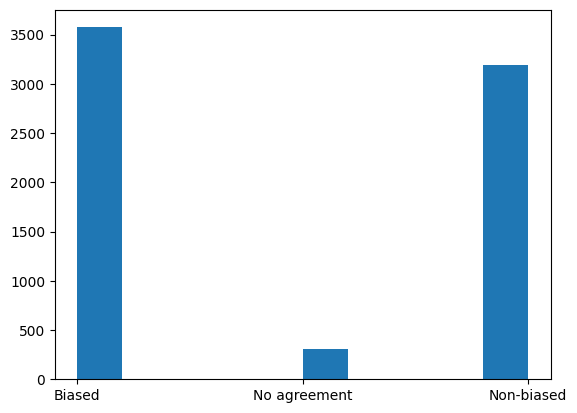

In [177]:
plt.hist(babe['label_bias'])
plt.plot()

In [178]:
babe.isna().sum()

text                0
news_link          79
outlet              0
topic               0
type             1000
group_id         5374
num_sent         5374
label_bias          0
label_opinion       0
article          5479
biased_words        0
dtype: int64

In [179]:
babe.size

77814

In [180]:
babe_notnull = babe.dropna()

In [181]:
babe_notnull.isna().sum()


text             0
news_link        0
outlet           0
topic            0
type             0
group_id         0
num_sent         0
label_bias       0
label_opinion    0
article          0
biased_words     0
dtype: int64

In [182]:
babe_notnull.size

17336

In [183]:
babe_notnull.drop(columns=['type'])

,text,news_link,outlet,topic,group_id,num_sent,label_bias,label_opinion,article,biased_words
0,YouTube is making clear there will be no “birt...,https://eu.usatoday.com/story/tech/2020/02/03/...,usa-today,elections-2020,1.0,1.0,Biased,Somewhat factual but also opinionated,YouTube says no ‘deepfakes’ or ‘birther’ video...,"['belated', 'birtherism']"
1,So while there may be a humanitarian crisis dr...,https://www.alternet.org/2019/01/here-are-5-of...,alternet,immigration,1.0,1.0,Biased,Expresses writer’s opinion,Speaking to the country for the first time fro...,['crisis']
2,"Looking around the United States, there is nev...",https://thefederalist.com/2020/03/11/woman-who...,federalist,abortion,1.0,1.0,Biased,Somewhat factual but also opinionated,The left has a thing for taking babies hostage...,"['killing', 'never', 'developing', 'humans', '..."
3,The Republican president assumed he was helpin...,http://www.msnbc.com/rachel-maddow-show/auto-i...,msnbc,environment,1.0,1.0,Biased,Expresses writer’s opinion,"In Barack Obama’s first term, the administrati...","['rejects', 'happy', 'assumed']"
4,The explosion of the Hispanic population has l...,https://www.breitbart.com/politics/2015/02/26/...,breitbart,student-debt,1.0,1.0,Biased,No agreement,"Republicans should stop fighting amnesty, Pres...",['explosion']
...,...,...,...,...,...,...,...,...,...,...
1694,"Sen. Bernie Sanders, I-Vt., went after Pete Bu...",https://www.nbcnews.com/politics/meet-the-pres...,msnbc,middle-class,85.0,1.0,Non-biased,Entirely factual,SEE NEW POSTS\nSanders hits Buttigieg for bill...,"['after', 'went']"
1695,"Last week, Barstool Sports founder Dave Portno...",https://thefederalist.com/2020/05/18/how-you-c...,federalist,coronavirus,85.0,1.0,Non-biased,Somewhat factual but also opinionated,Not everyone seething about the ongoing abuses...,"['ranted', 'vigorously']"
1696,"Coincidentally, many Republican lawmakers who ...",https://www.alternet.org/2020/01/follow-the-mo...,alternet,middle-class,85.0,1.0,Non-biased,Somewhat factual but also opinionated,It’s long been obvious that Republican senator...,['increased']
1698,"As a self-described Democratic socialist, Sen....",https://www.foxnews.com/politics/how-did-berni...,fox-news,middle-class,85.0,1.0,Non-biased,Entirely factual,"As a self-described Democratic socialist, Sen....",['outspoken']


In [184]:
babe_notnull['label_bias'] = babe_notnull['label_bias'].replace({'No agreement': 'Biased'})

C:\Users\ritik\AppData\Local\Temp\ipykernel_12912\1046195544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  babe_notnull['label_bias'] = babe_notnull['label_bias'].replace({'No agreement': 'Biased'})


In [185]:
babe_notnull['label_bias'].unique()

array(['Biased', 'Non-biased'], dtype=object)

[]

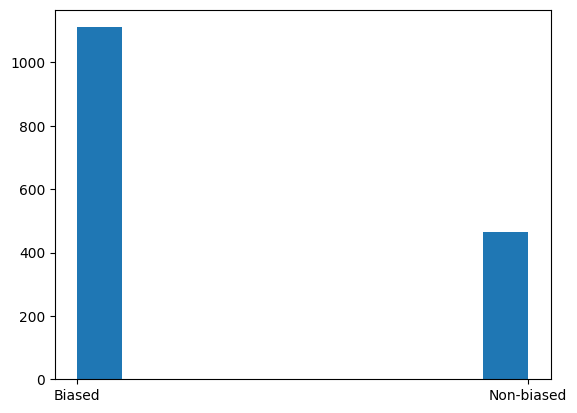

In [186]:
plt.hist(babe_notnull['label_bias'])
plt.plot()

In [187]:
babe_notnull['label_bias'].value_counts()

label_bias
Biased        1111
Non-biased     465
Name: count, dtype: int64

In [188]:
babe_notnull.shape[0]

1576

In [189]:
(babe_notnull['label_bias'] == 'Biased').sum()/babe_notnull.shape[0] *100

70.49492385786802

In [190]:
(babe_notnull['label_bias'] == 'Non-biased').sum()/babe_notnull.shape[0] *100

29.50507614213198

So we see a class imbalance here 
Biased -> 70.5
Non-Biased -> 29.5

In [191]:
babe_notnull.head()

,text,news_link,outlet,topic,type,group_id,num_sent,label_bias,label_opinion,article,biased_words
0,YouTube is making clear there will be no “birt...,https://eu.usatoday.com/story/tech/2020/02/03/...,usa-today,elections-2020,center,1.0,1.0,Biased,Somewhat factual but also opinionated,YouTube says no ‘deepfakes’ or ‘birther’ video...,"['belated', 'birtherism']"
1,So while there may be a humanitarian crisis dr...,https://www.alternet.org/2019/01/here-are-5-of...,alternet,immigration,left,1.0,1.0,Biased,Expresses writer’s opinion,Speaking to the country for the first time fro...,['crisis']
2,"Looking around the United States, there is nev...",https://thefederalist.com/2020/03/11/woman-who...,federalist,abortion,right,1.0,1.0,Biased,Somewhat factual but also opinionated,The left has a thing for taking babies hostage...,"['killing', 'never', 'developing', 'humans', '..."
3,The Republican president assumed he was helpin...,http://www.msnbc.com/rachel-maddow-show/auto-i...,msnbc,environment,left,1.0,1.0,Biased,Expresses writer’s opinion,"In Barack Obama’s first term, the administrati...","['rejects', 'happy', 'assumed']"
4,The explosion of the Hispanic population has l...,https://www.breitbart.com/politics/2015/02/26/...,breitbart,student-debt,right,1.0,1.0,Biased,No agreement,"Republicans should stop fighting amnesty, Pres...",['explosion']


In [192]:
babe_notnull['topic'].unique()

array(['elections-2020', 'immigration', 'abortion', 'environment',
       'student-debt', 'vaccines', 'sport', 'white-nationalism',
       'coronavirus', 'trump-presidency',
       'international-politics-and-world-news', 'gun-control',
       'middle-class', 'gender'], dtype=object)

[]

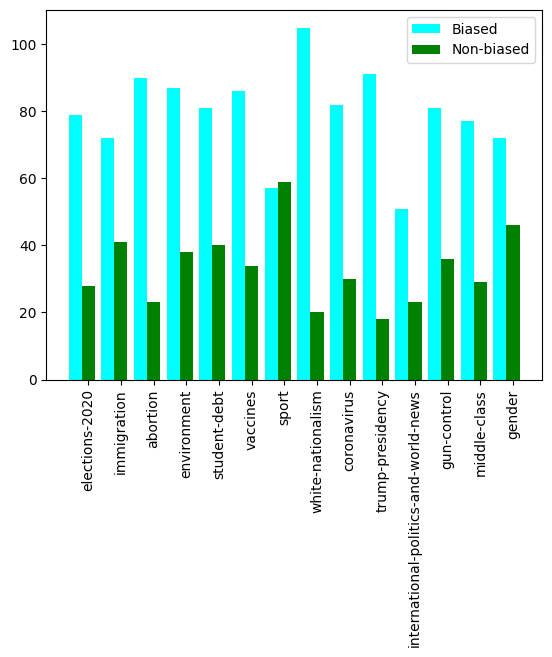

In [193]:
x= np.arange(14)
topic=babe_notnull['topic'].unique()
width=0.4
for i in x:
    plt.bar(i-0.4, (babe_notnull[babe_notnull['topic']==topic[i]]['label_bias'] == 'Biased').sum(), width, color='cyan')
    plt.bar(i, (babe_notnull[babe_notnull['topic']==topic[i]]['label_bias'] == 'Non-biased').sum(), width, color='green')
plt.xticks(x,topic,rotation='vertical')
plt.legend(babe_notnull['label_bias'].unique())
plt.plot()

In [194]:
Biased = ' '.join(list(babe_notnull.text[babe_notnull.label_bias == 'Biased']))
Non_biased = ' '.join(list(babe_notnull.text[babe_notnull.label_bias == 'Non-biased']))


In [195]:
Biased

'YouTube is making clear there will be no “birtherism” on its platform during this year’s U.S. presidential election – a belated response to a type of conspiracy theory more prevalent in the 2012 race. So while there may be a humanitarian crisis driving more vulnerable people to seek asylum in the United States, there is no security crisis. Looking around the United States, there is never enough welfare for the left to stop killing developing humans in utero—solidly Democratic states lead the nation in abortion rates.  The Republican president assumed he was helping the industry at the expense of the environment – a trade-off Trump was happy to make since he rejects climate science anyway.  The explosion of the Hispanic population has long-term job prospect consequences as well: Both legal and illegal aliens will occupy 75 percent of new American jobs in as little as five years. The anti-vaccine movement made headlines last spring, when widespread distrust of the pharmaceutical industr

In [196]:

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [197]:
from wordcloud import WordCloud

def wordcloud(text, title):
    wordcloud = WordCloud(
        width = 1600,
        height = 1000,
        background_color = "black",
        stopwords = stop_words,
        min_font_size = 10
    ).generate(text)

    plt.figure(figsize = (16, 10), facecolor = None) 
    plt.imshow(wordcloud)
    plt.title("Word Cloud for " + title + " Articles\n", fontsize = 20)
    plt.axis("off")
    plt.show()

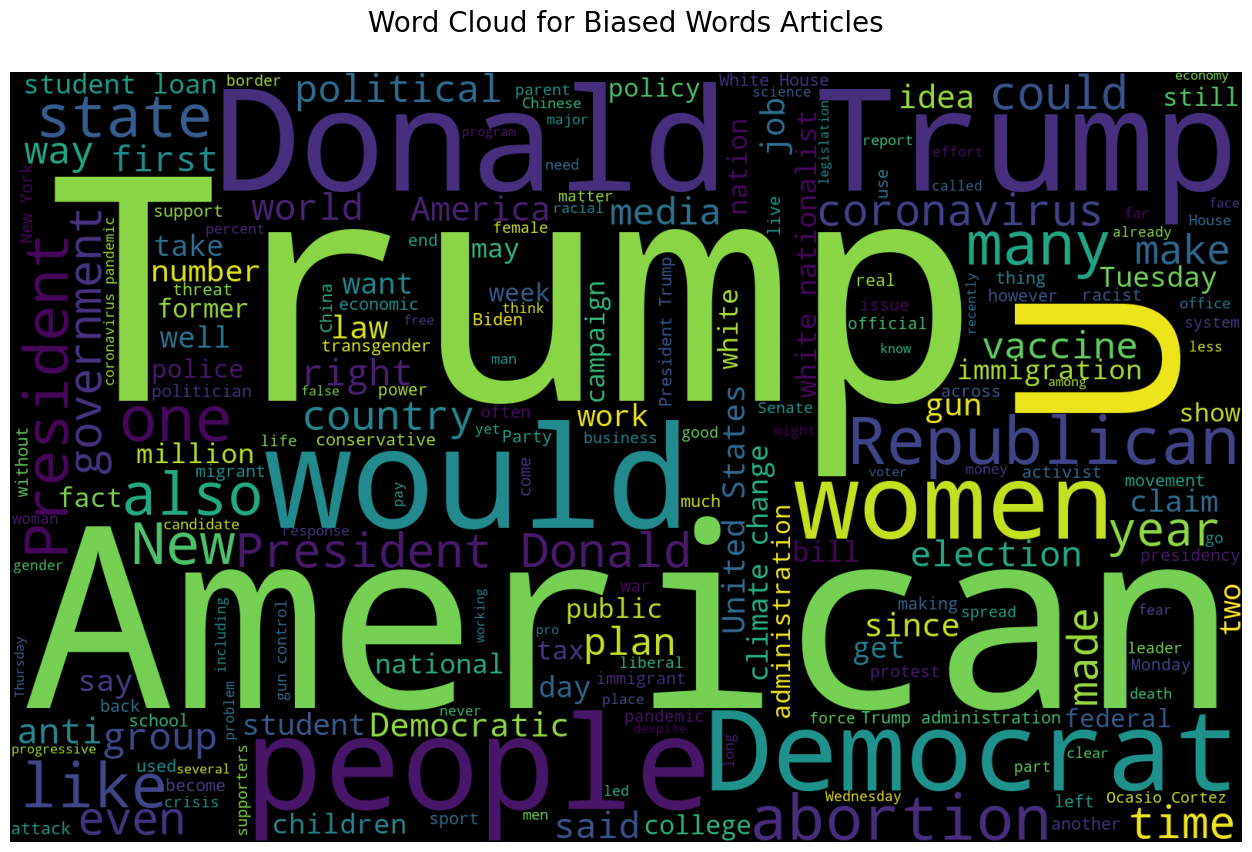

In [198]:

wordcloud(Biased, "Biased Words")